# Decision Tree Model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#https://www.datacamp.com/community/tutorials/decision-tree-classification-python?utm_source=adwords_ppc&utm_campaignid=1455363063&utm_adgroupid=65083631748&utm_device=c&utm_keyword=&utm_matchtype=b&utm_network=g&utm_adpostion=&utm_creative=278443377095&utm_targetid=aud-522010995285:dsa-429603003980&utm_loc_interest_ms=&utm_loc_physical_ms=9074464&gclid=CjwKCAjw95yJBhAgEiwAmRrutP4JQV5tHvjAp3G1xe40catE4Ngnjen6STCxUvEat3wK7luuiPxBKxoCqJ4QAvD_BwE
#data https://www.kaggle.com/uciml/pima-indians-diabetes-database
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report
import matplotlib.pyplot as plt

Loading data

In [ ]:
# load dataset
pima = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/diabetes.csv")
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Feature Selection

In [ ]:
feature_cols = ['Pregnancies', 'Glucose','BloodPressure','SkinThickness', 'Insulin','BMI','DiabetesPedigreeFunction','Age']# 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.Outcome # Target variable

Splitting Data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
#print(X_train, y_train)

Building Decision Tree Model

In [ ]:
clf = DecisionTreeClassifier()
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

Evaluating Model

> Indented block



In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6926406926406926


In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_pred, y_test))
print(classification_report(y_pred, y_test))

Accuracy: 0.6926406926406926
[[116  41]
 [ 30  44]]
              precision    recall  f1-score   support

           0       0.79      0.74      0.77       157
           1       0.52      0.59      0.55        74

    accuracy                           0.69       231
   macro avg       0.66      0.67      0.66       231
weighted avg       0.71      0.69      0.70       231



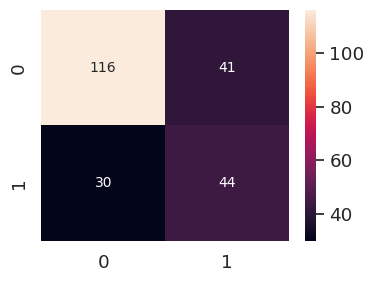

In [ ]:
import seaborn as sn
cm = confusion_matrix(y_pred, y_test)
df_cm = pd.DataFrame(cm, range(2), range(2))
plt.figure(figsize=(4,3))
sn.set(font_scale=1.2) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 10}, fmt='g') # for num predict size

plt.savefig('filename.png')

Visualizing Decision Trees

[Text(0.4055631868131868, 0.9705882352941176, 'x[1] <= 129.5\ngini = 0.449\nsamples = 537\nvalue = [354, 183]'),
 Text(0.14800824175824176, 0.9117647058823529, 'x[5] <= 26.3\ngini = 0.329\nsamples = 357\nvalue = [283, 74]'),
 Text(0.04395604395604396, 0.8529411764705882, 'x[5] <= 9.1\ngini = 0.06\nsamples = 97\nvalue = [94, 3]'),
 Text(0.02197802197802198, 0.7941176470588235, 'x[1] <= 114.5\ngini = 0.444\nsamples = 6\nvalue = [4, 2]'),
 Text(0.01098901098901099, 0.7352941176470589, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.03296703296703297, 0.7352941176470589, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.06593406593406594, 0.7941176470588235, 'x[6] <= 0.669\ngini = 0.022\nsamples = 91\nvalue = [90, 1]'),
 Text(0.054945054945054944, 0.7352941176470589, 'gini = 0.0\nsamples = 76\nvalue = [76, 0]'),
 Text(0.07692307692307693, 0.7352941176470589, 'x[6] <= 0.705\ngini = 0.124\nsamples = 15\nvalue = [14, 1]'),
 Text(0.06593406593406594, 0.6764705882352942, 'gini = 0.0\nsamp

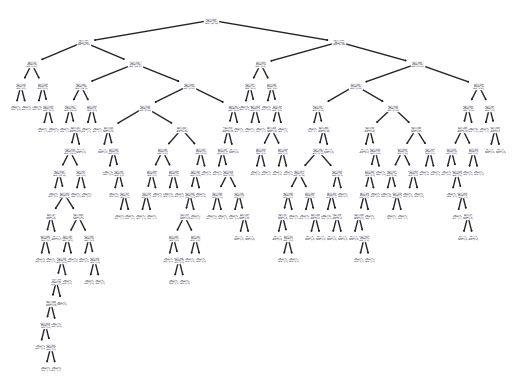

In [ ]:
tree.plot_tree(clf)

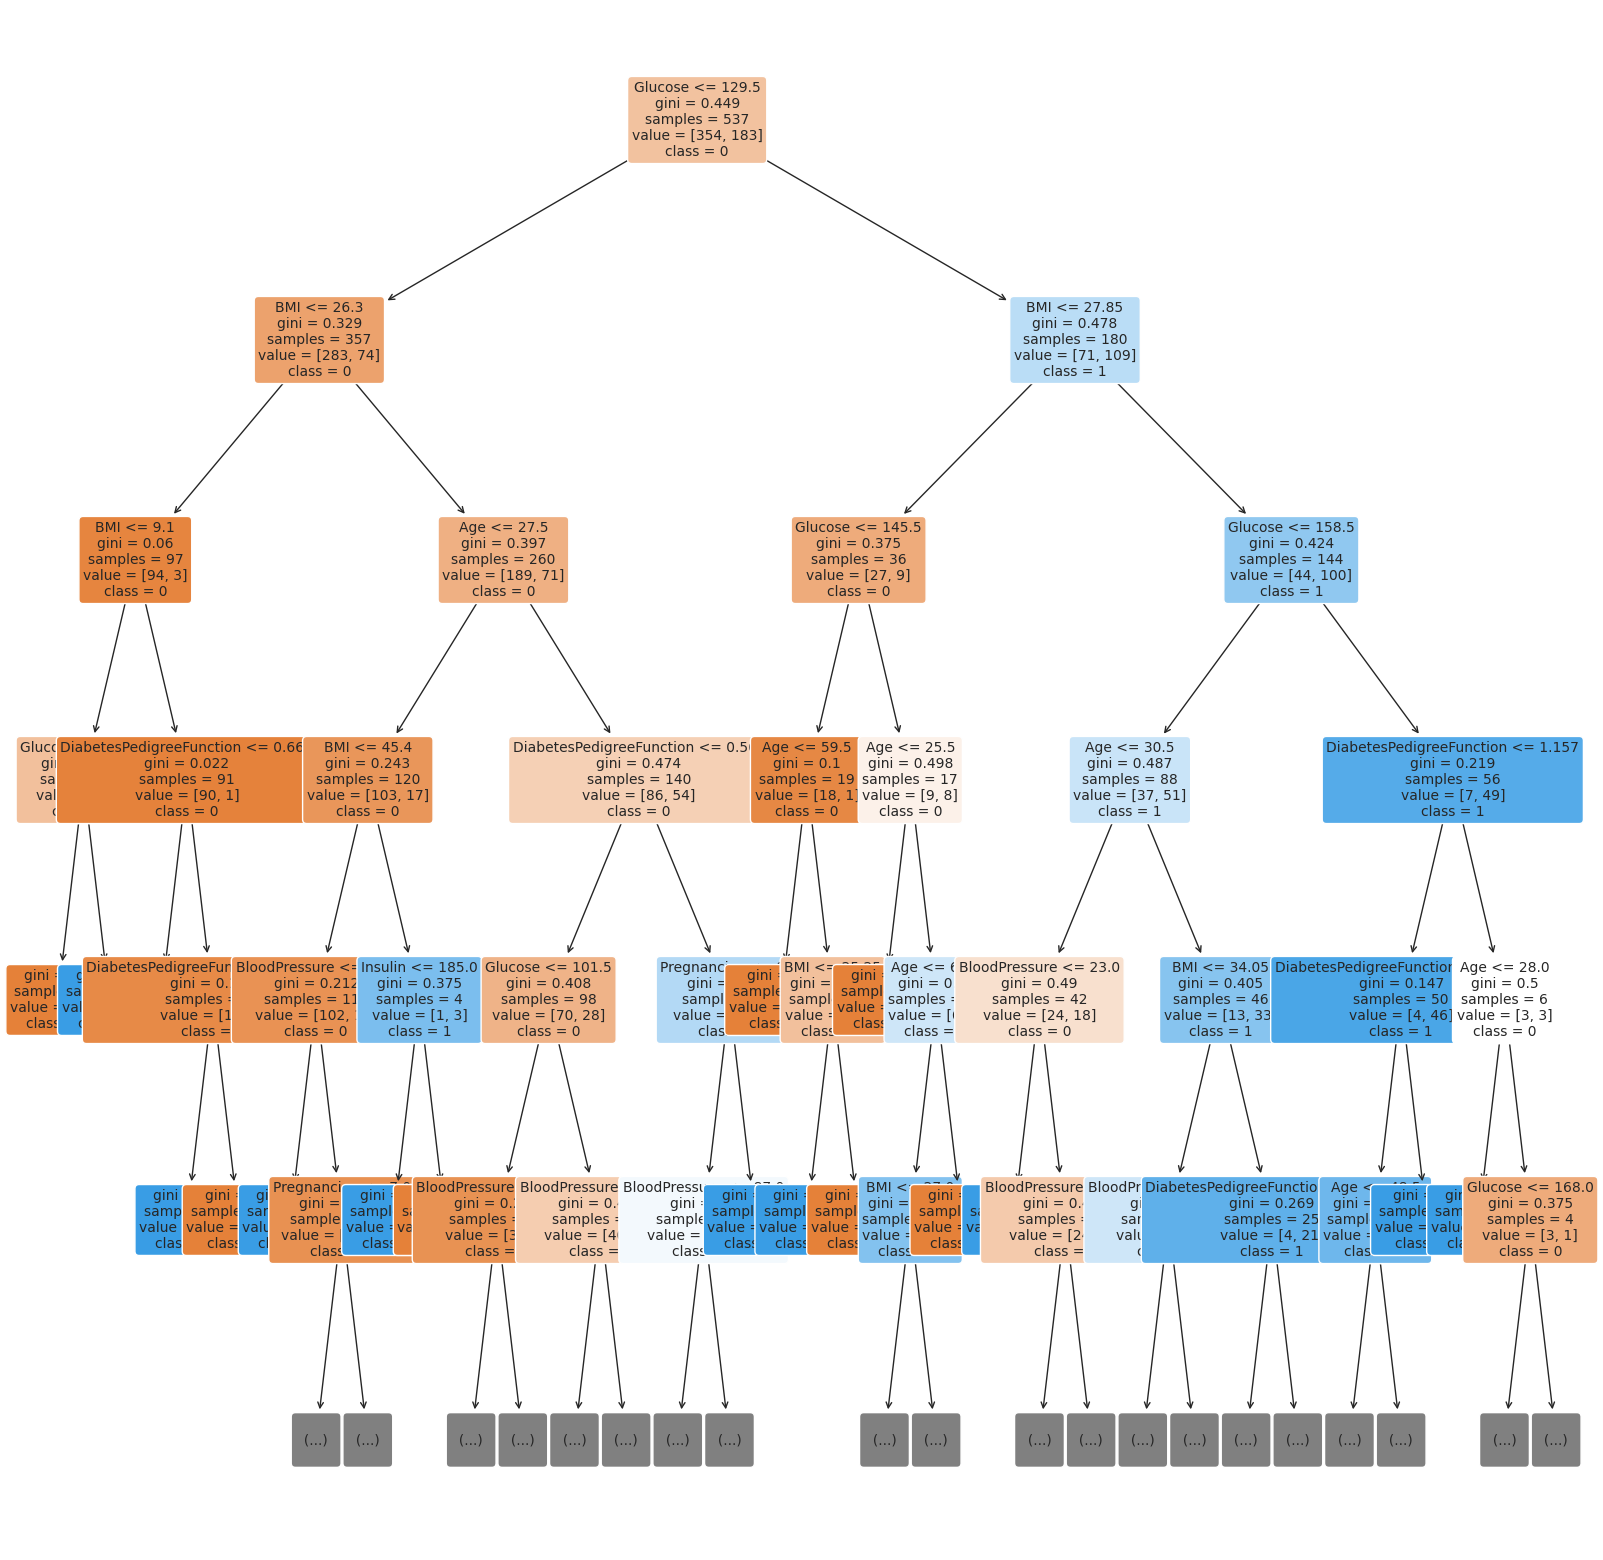

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(20,20))
_ = tree.plot_tree(clf, feature_names = feature_cols,
    filled=True, fontsize=10, rounded = True,class_names=['0','1'],max_depth=5)
plt.show()

plt.savefig('tree1.png')

In [ ]:
#tree.plot_tree(clf)
from sklearn.tree import export_text
r = export_text(clf, feature_names=feature_cols)
print(r)

|--- Glucose <= 129.50
|   |--- BMI <= 26.30
|   |   |--- BMI <= 9.10
|   |   |   |--- Glucose <= 114.50
|   |   |   |   |--- class: 0
|   |   |   |--- Glucose >  114.50
|   |   |   |   |--- class: 1
|   |   |--- BMI >  9.10
|   |   |   |--- DiabetesPedigreeFunction <= 0.67
|   |   |   |   |--- class: 0
|   |   |   |--- DiabetesPedigreeFunction >  0.67
|   |   |   |   |--- DiabetesPedigreeFunction <= 0.71
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- DiabetesPedigreeFunction >  0.71
|   |   |   |   |   |--- class: 0
|   |--- BMI >  26.30
|   |   |--- Age <= 27.50
|   |   |   |--- BMI <= 45.40
|   |   |   |   |--- BloodPressure <= 12.00
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- BloodPressure >  12.00
|   |   |   |   |   |--- Pregnancies <= 7.00
|   |   |   |   |   |   |--- DiabetesPedigreeFunction <= 1.27
|   |   |   |   |   |   |   |--- BMI <= 30.95
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- BMI >  30.95
|   |   |   |   |   |   

In [ ]:
!pip install graphviz
!pip install pydotplus

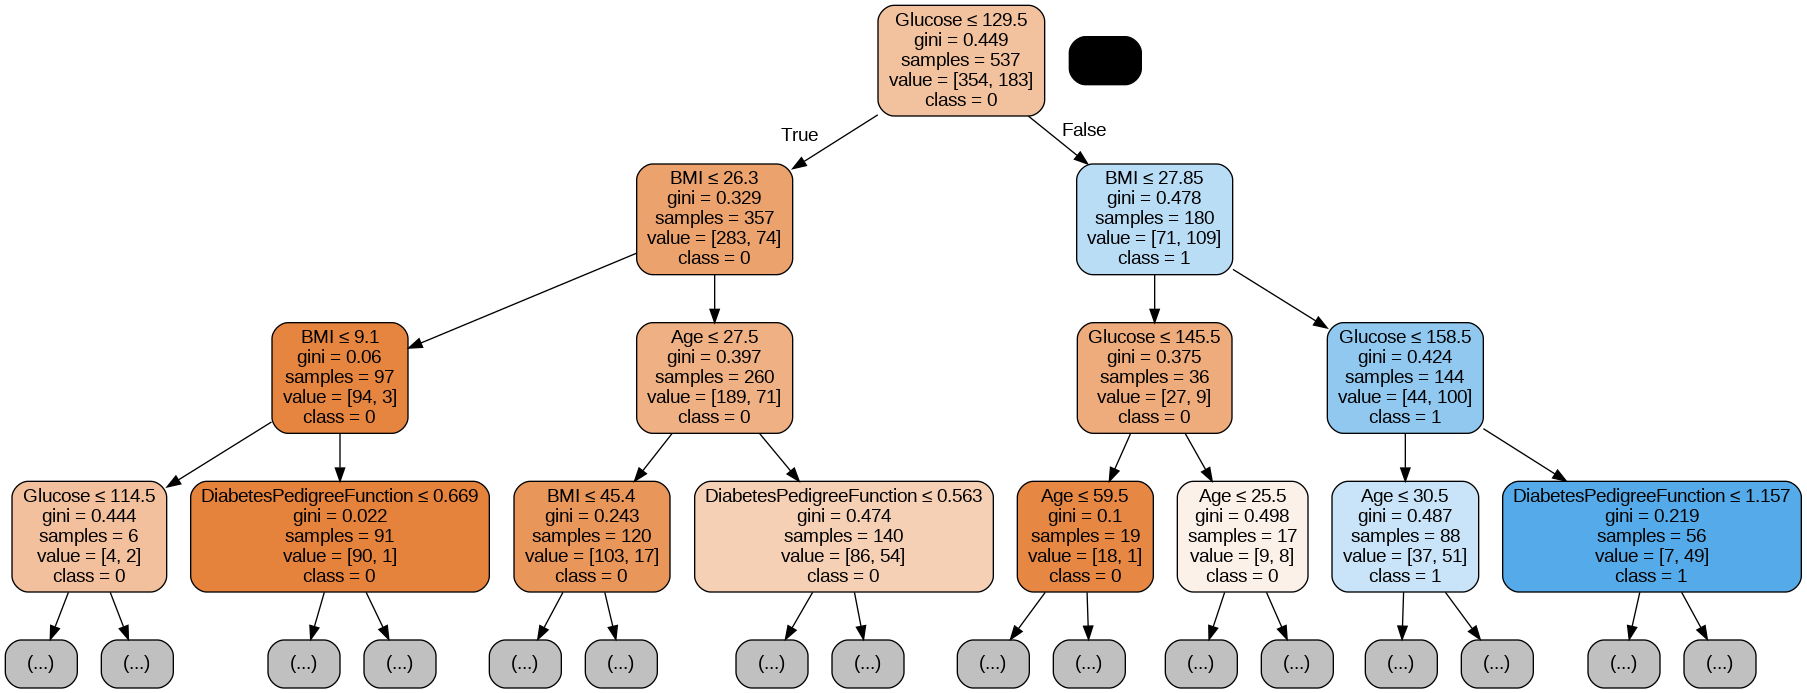

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'], max_depth=3)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())

# Tree Optimization

Optimizing Decision Tree Performance

In [ ]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=4)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7792207792207793


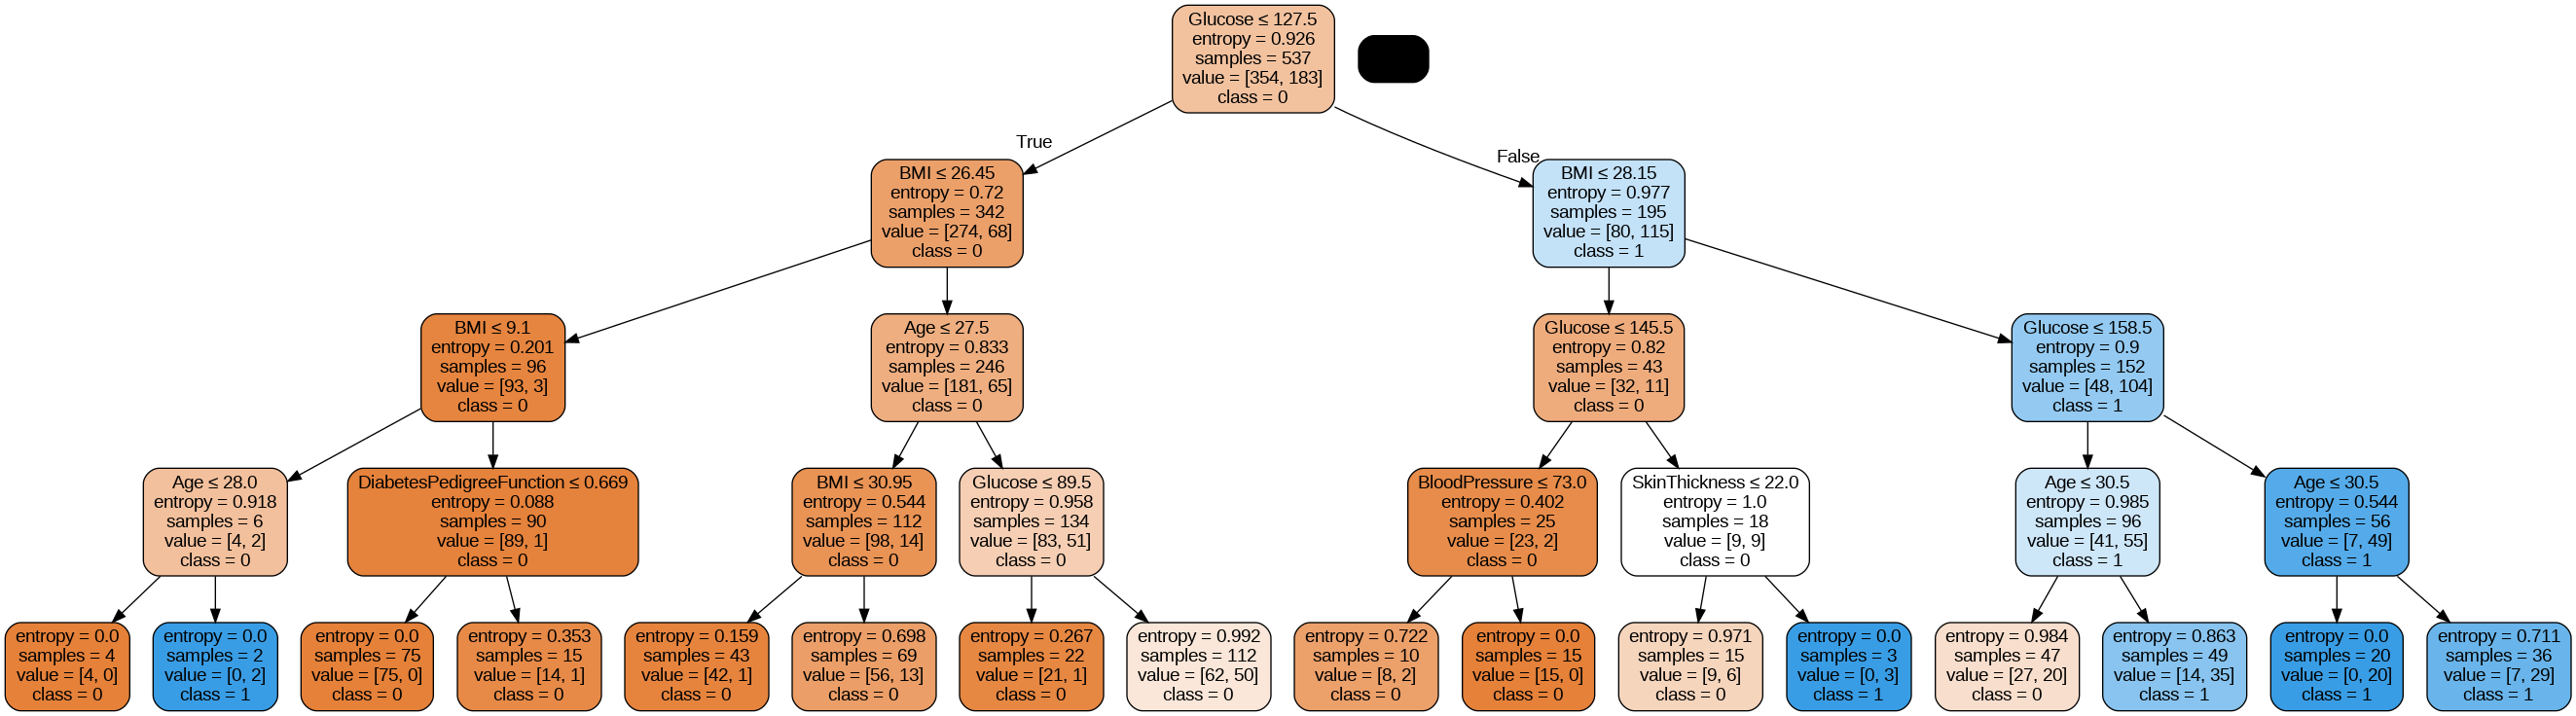

In [ ]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())

Save Load Model

In [ ]:
# save the model to disk
import joblib
filename = '/content/drive/MyDrive/Colab Notebooks/finalized_decision_tree_model.hd5'
joblib.dump(clf, filename)

# some time later...

# load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test, y_test)
print(result)

0.7792207792207793


# Randomforest

Randomforest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_model = RandomForestClassifier()
random_model.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred = random_model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7922077922077922


In [ ]:
y_pred = random_model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_pred, y_test))
print(classification_report(y_pred, y_test))

Accuracy: 0.7922077922077922
[[131  33]
 [ 15  52]]
              precision    recall  f1-score   support

           0       0.90      0.80      0.85       164
           1       0.61      0.78      0.68        67

    accuracy                           0.79       231
   macro avg       0.75      0.79      0.76       231
weighted avg       0.81      0.79      0.80       231



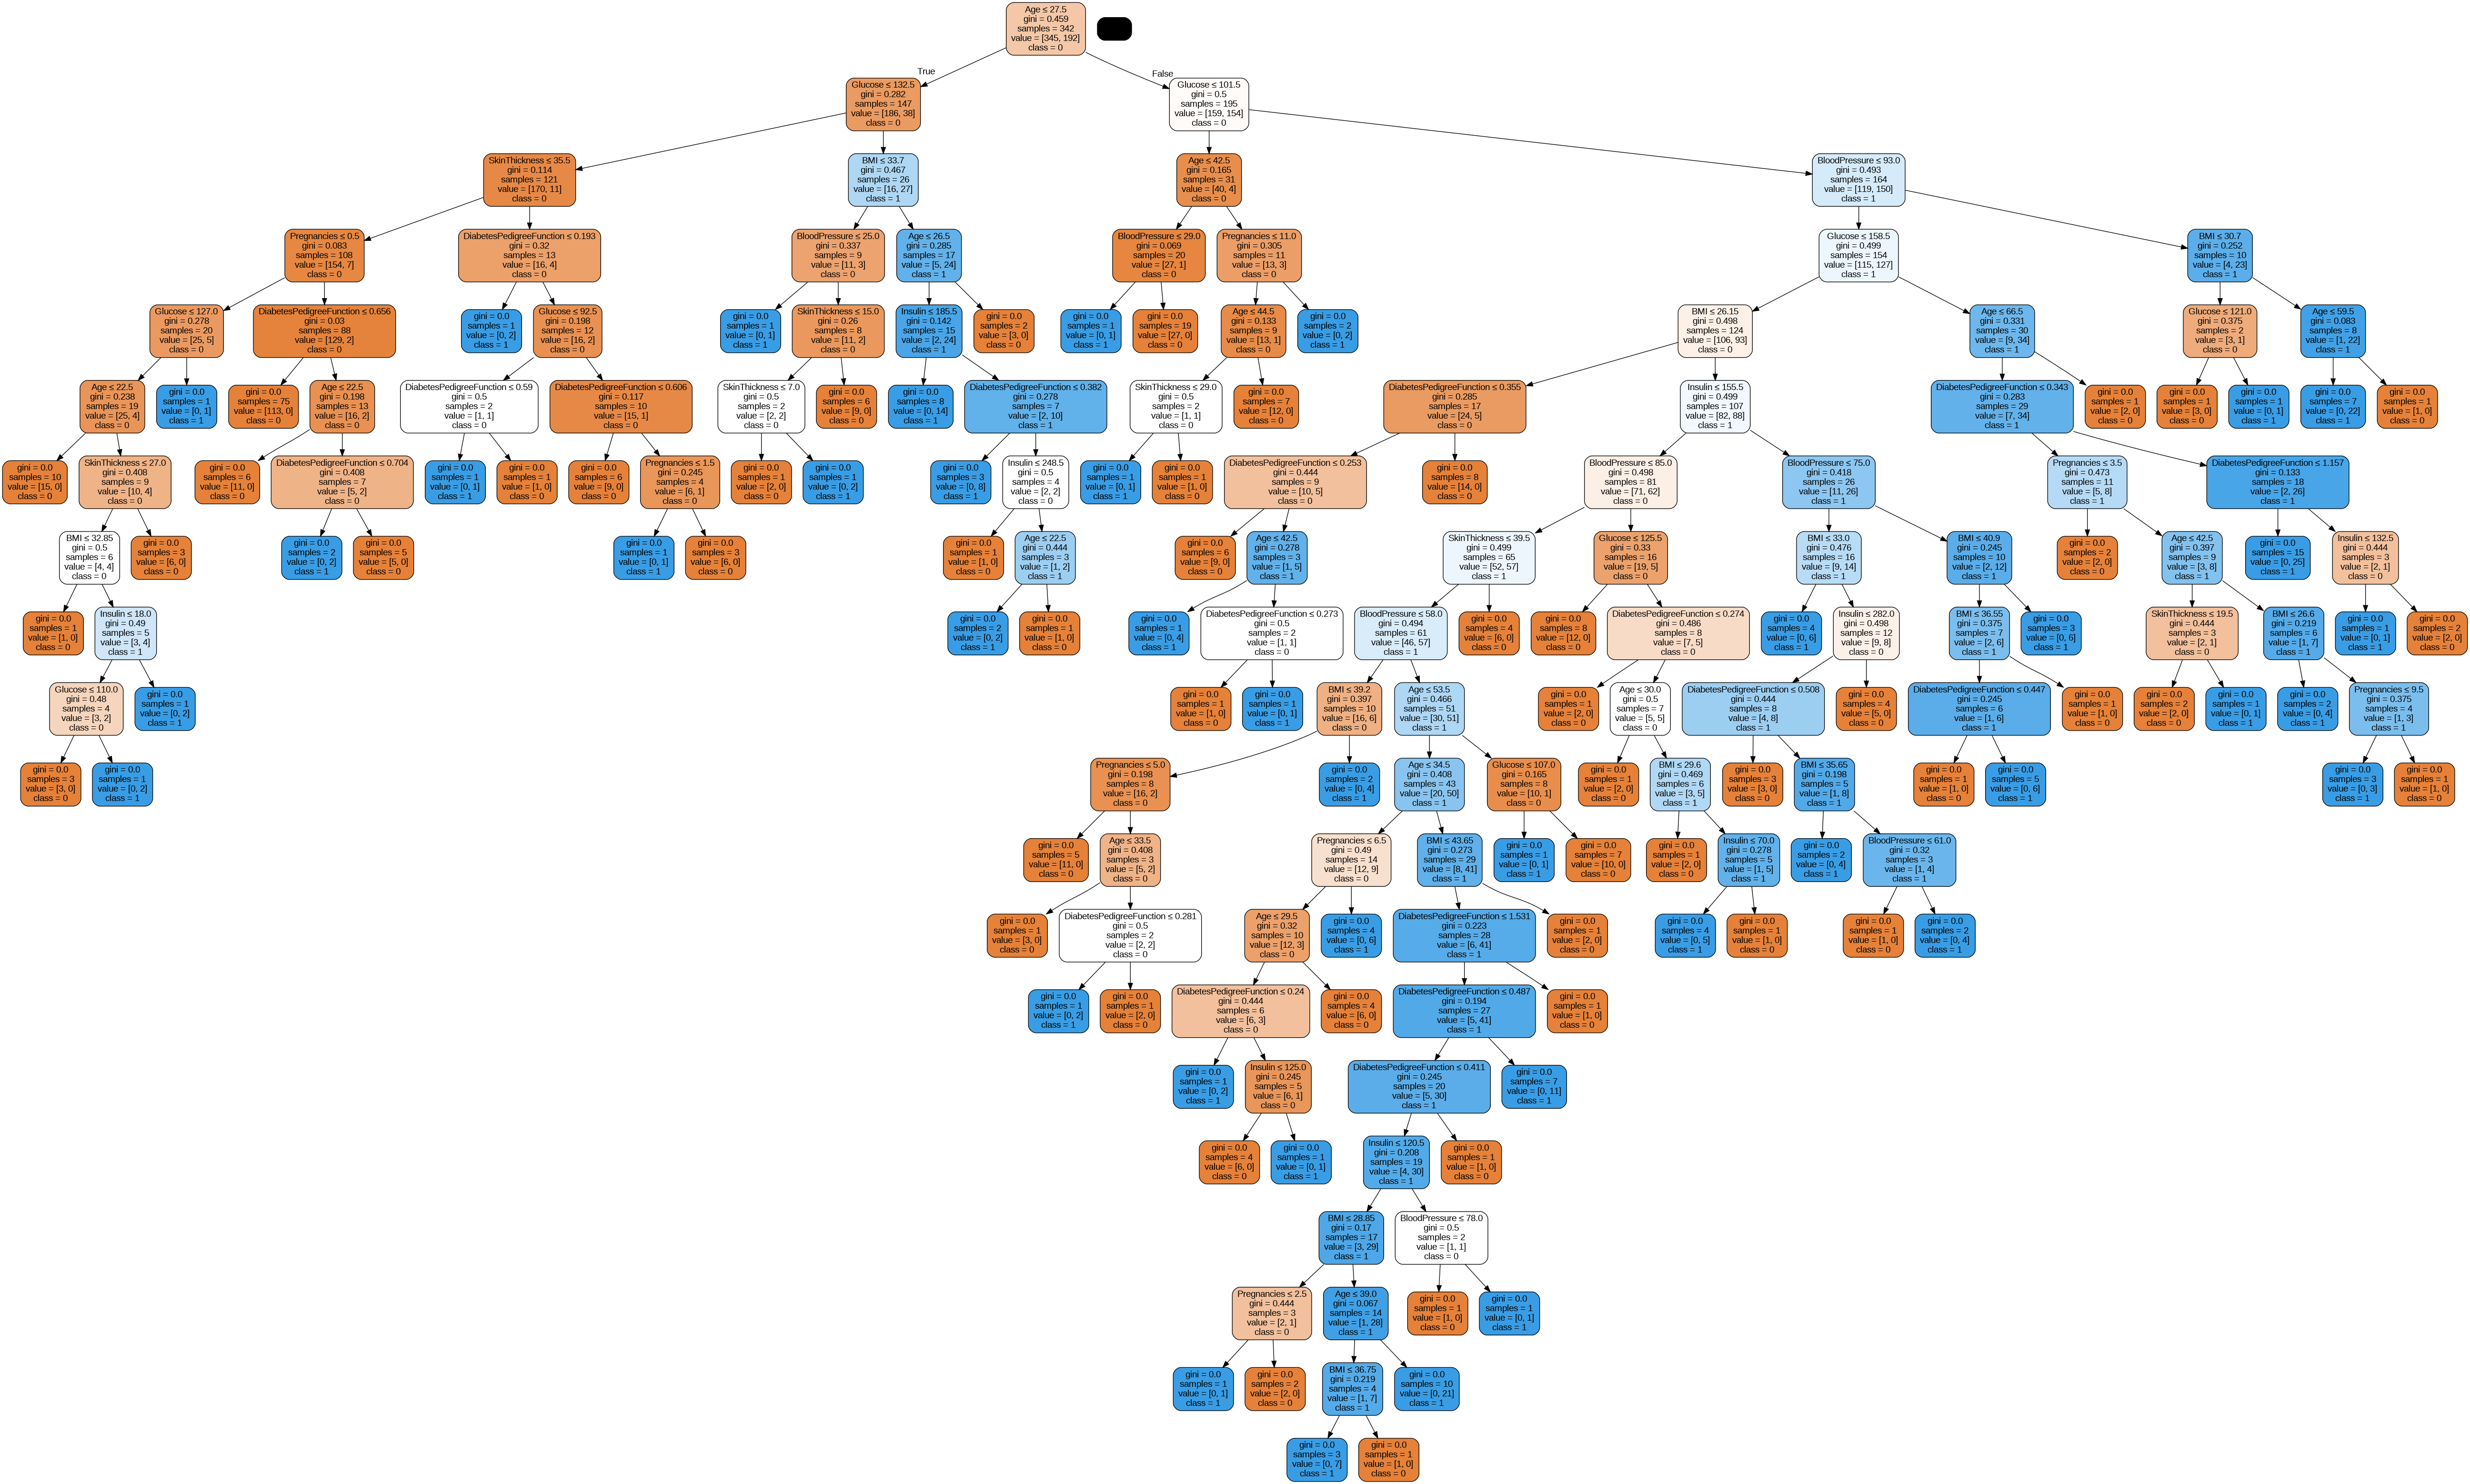

In [ ]:
estimator = random_model.estimators_[5]
dot_data = StringIO()
export_graphviz(estimator, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes_random.png')
Image(graph.create_png())



In [ ]:
#tree.plot_tree(clf)
from sklearn.tree import export_text
r = export_text(estimator, feature_names=feature_cols)
print(r)

|--- Age <= 27.50
|   |--- Glucose <= 132.50
|   |   |--- SkinThickness <= 35.50
|   |   |   |--- Pregnancies <= 0.50
|   |   |   |   |--- Glucose <= 127.00
|   |   |   |   |   |--- Age <= 22.50
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |--- Age >  22.50
|   |   |   |   |   |   |--- SkinThickness <= 27.00
|   |   |   |   |   |   |   |--- BMI <= 32.85
|   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |--- BMI >  32.85
|   |   |   |   |   |   |   |   |--- Insulin <= 18.00
|   |   |   |   |   |   |   |   |   |--- Glucose <= 110.00
|   |   |   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |   |   |--- Glucose >  110.00
|   |   |   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |   |--- Insulin >  18.00
|   |   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |--- SkinThickness >  27.00
|   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- Glucose >  127.00
|   |   | 

ให้นิสิตทำการ save model


In [ ]:
import joblib
filename = '/content/drive/MyDrive/Colab Notebooks/finalized_random_forest_model.hd5'
joblib.dump(clf, filename)

['/content/drive/MyDrive/Colab Notebooks/finalized_random_forest_model.hd5']